In [3]:

import numpy as np
import pandas as pd
import shap

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import seaborn as sb
import scipy
from scipy.stats import spearmanr
from sklearn import datasets
import statsmodels.api as sm
import numpy as np
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
df.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:

X = df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


In [7]:

xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

xgb.feature_importances_


array([4.4450927e-01, 1.4768447e-01, 1.7067093e-02, 2.3260780e-03,
       3.8176128e-01, 5.5183098e-03, 0.0000000e+00, 5.7382937e-07,
       2.0235122e-07, 1.1327403e-03], dtype=float32)

<BarContainer object of 10 artists>

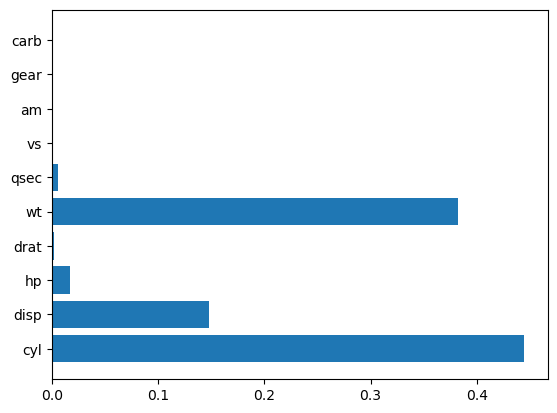

In [8]:

plt.barh(X.columns, xgb.feature_importances_)


Text(0.5, 0, 'Xgboost Feature Importance')

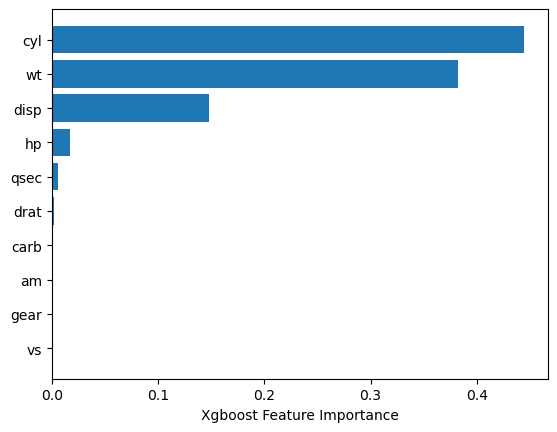

In [10]:

sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


Text(0.5, 0, 'Permutation Importance')

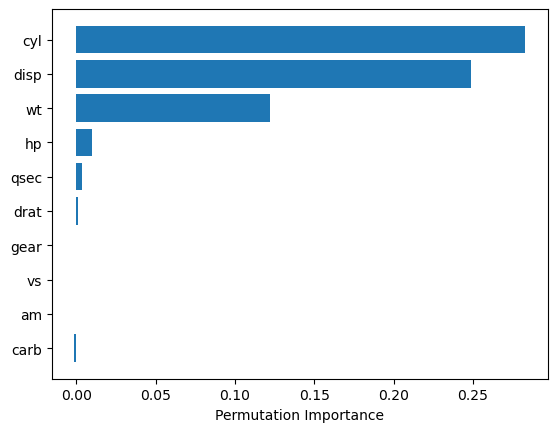

In [23]:

# The second method to compute feature importance uses the permutation method to randomly shuffle each feature 
# and compute the change in the model’s performance. 
# The features which impact the performance the most are the most important ones.

perm_importance = permutation_importance(xgb, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


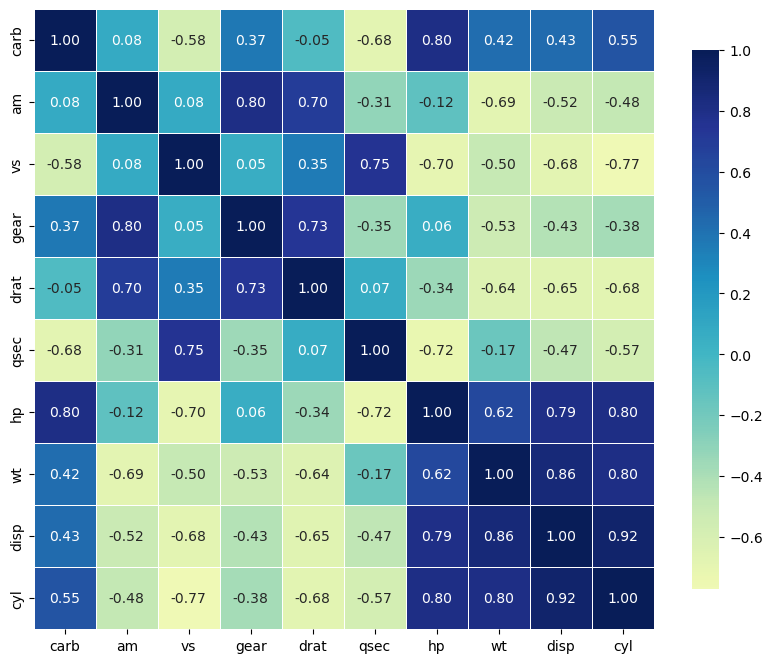

In [13]:

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X_train[X.columns[sorted_idx]])


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


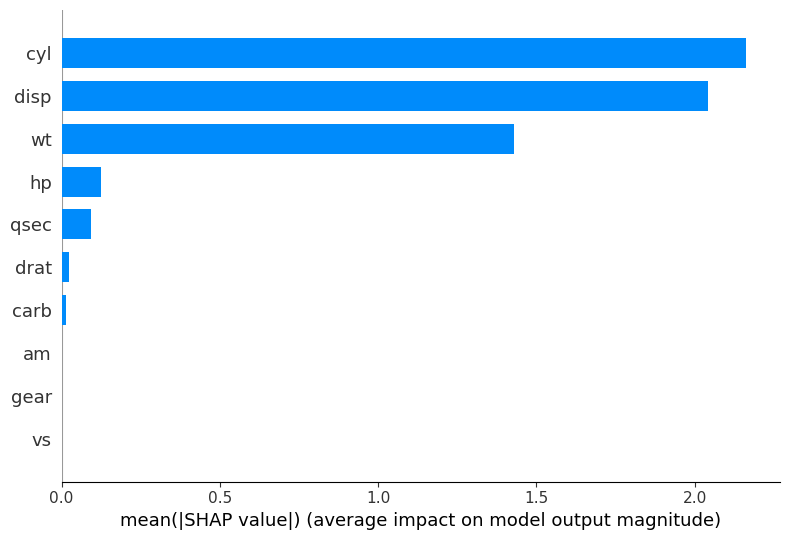

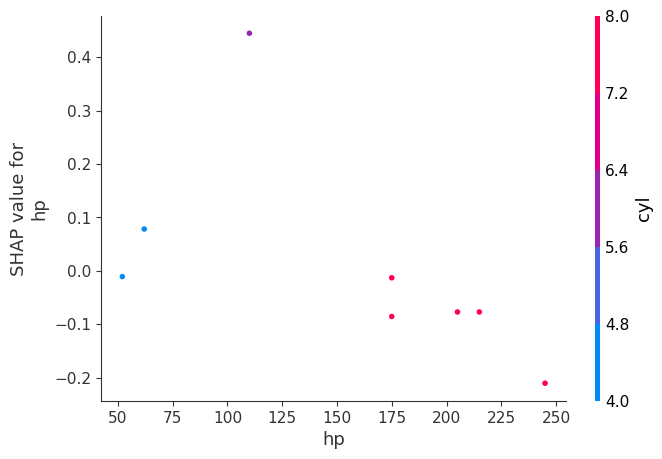

In [21]:

# Feature Importance Computed with SHAP Values
# The third method to compute feature importance in Xgboost is to use SHAP package. It is model-agnostic and 
# using the Shapley values from game theory to estimate the how does each feature contribute to the prediction.

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

shap.dependence_plot("hp", shap_values, X_test)

# RandomForest Feature importance
# https://mljar.com/blog/feature-importance-in-random-forest/


In [3]:

# And now we will look at solving a classification problem...
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Load data
data = load_breast_cancer()

df = pd.concat([
    pd.DataFrame(data.data, columns=data.feature_names),
    pd.DataFrame(data.target, columns=['y'])
], axis=1)

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [5]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
importances


,Attribute,Importance
19,fractal dimension error,0.733280
15,compactness error,0.634037
5,mean compactness,0.620392
18,symmetry error,0.526286
8,mean symmetry,0.236019
11,texture error,0.221366
25,worst compactness,0.122886
9,mean fractal dimension,0.083580
16,concavity error,-0.141356
29,worst fractal dimension,-0.145807


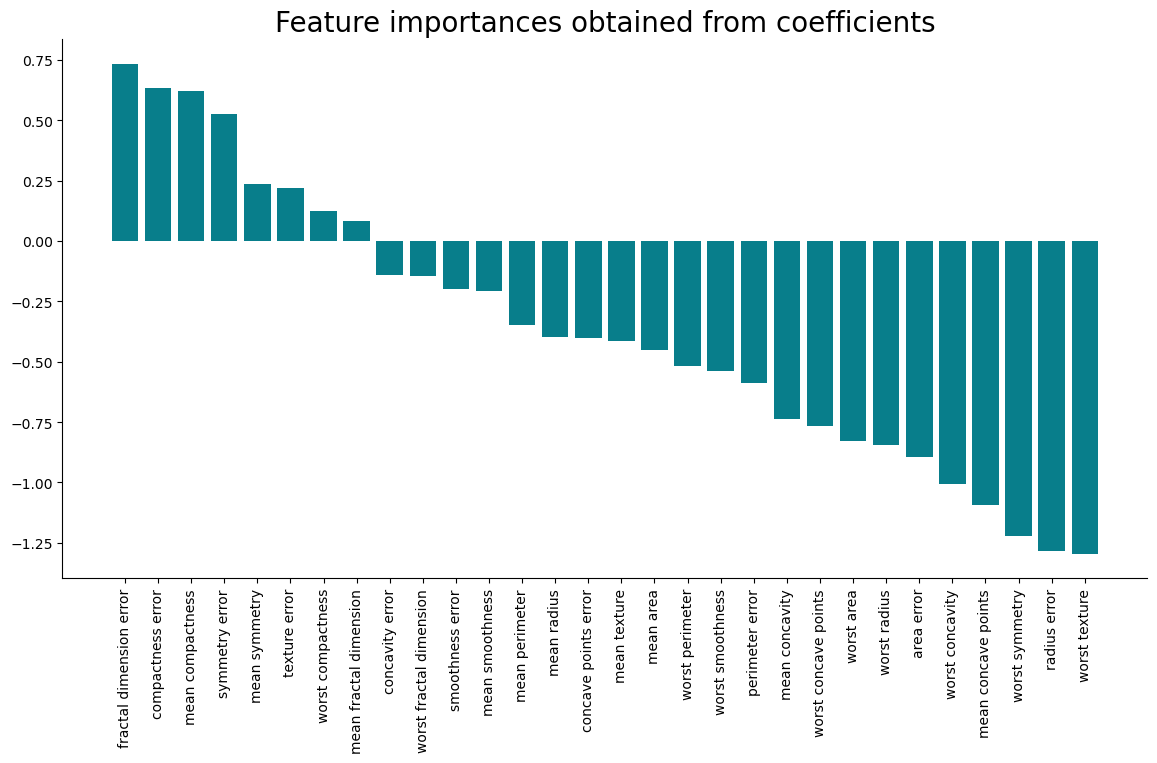

In [6]:

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


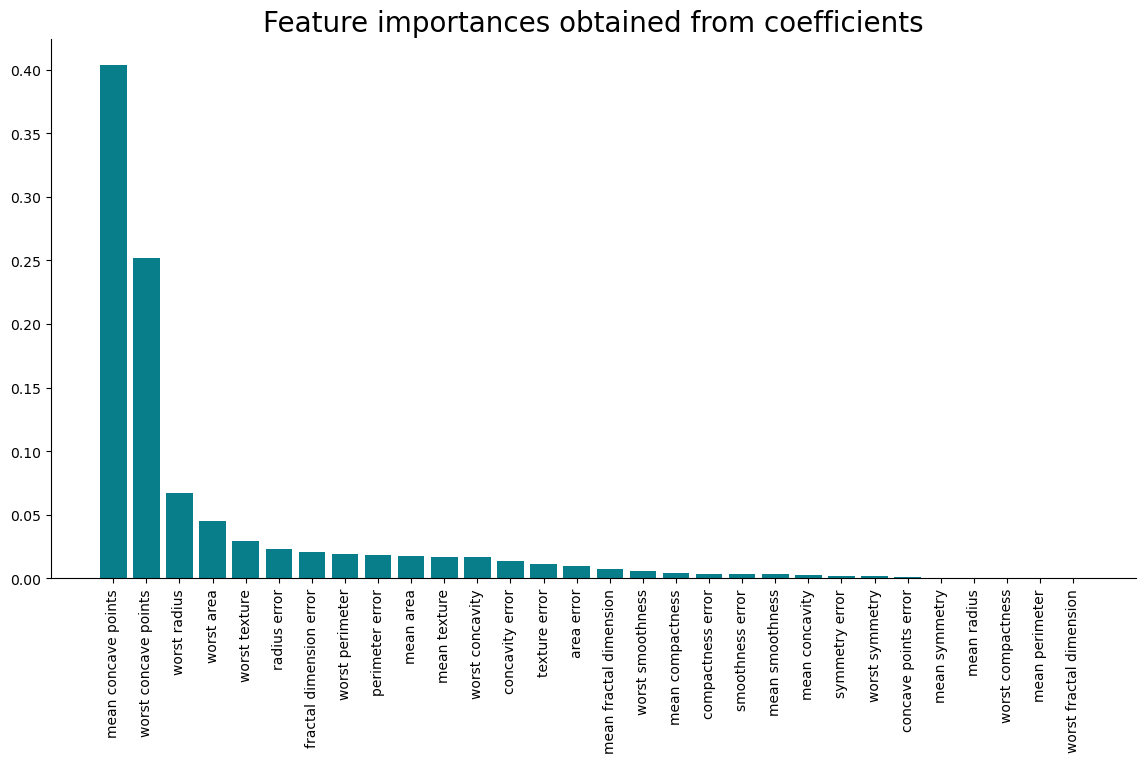

In [7]:

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


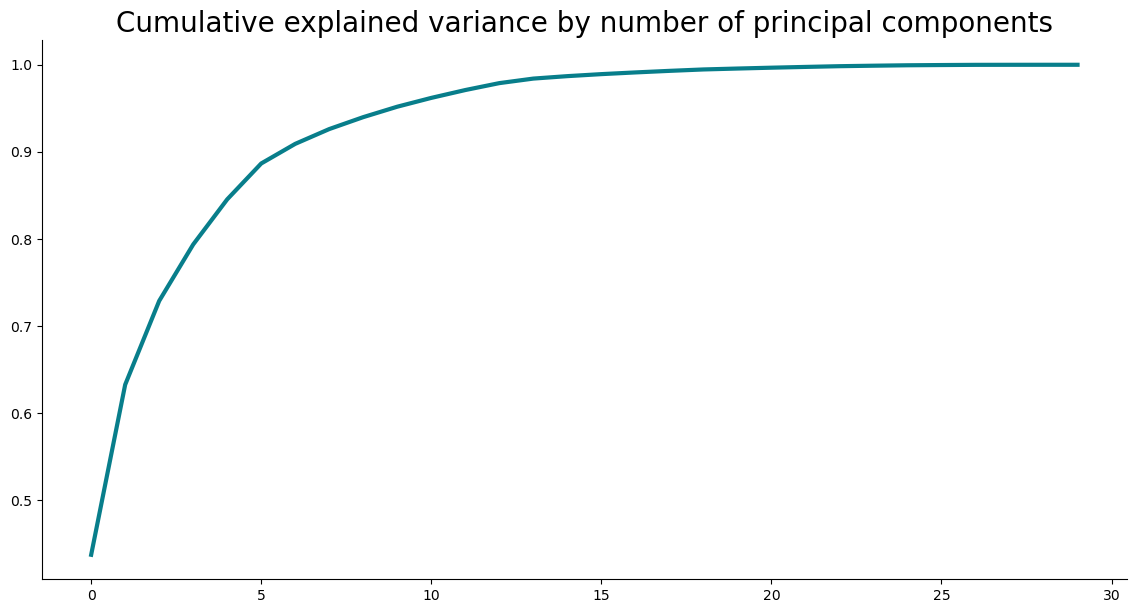

In [8]:

from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()


In [9]:

loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
mean radius,0.783559,-0.577423,-0.015448,-0.061600,0.056542,0.032320,-0.126638,0.004863,0.102699,0.070119,...,-0.019487,0.005920,-0.020009,-0.019015,0.012820,-0.011914,0.008478,0.007393,0.006400,0.007589
mean texture,0.371967,-0.128012,0.088003,0.851102,0.034107,-0.121844,0.004254,0.094800,-0.168652,-0.010506,...,0.062076,0.024667,-0.020541,0.003951,-0.013367,-0.001341,0.001087,0.000095,-0.000306,0.000015
mean perimeter,0.816365,-0.534263,-0.016573,-0.063863,0.056378,0.028074,-0.117411,-0.001225,0.100753,0.057988,...,-0.016562,0.008804,-0.009313,-0.012118,0.003980,-0.012644,0.007687,0.000773,0.010616,-0.007530
mean area,0.793613,-0.568269,0.047940,-0.082217,0.015615,0.002670,-0.065409,0.037467,0.103161,0.088953,...,-0.006398,0.016201,-0.003763,0.022362,0.016413,0.037472,-0.033660,-0.008272,-0.012786,-0.000350
mean smoothness,0.536881,0.420954,-0.215548,-0.176923,-0.483525,-0.299995,-0.094875,-0.210312,0.002419,-0.097695,...,-0.015056,-0.000303,-0.002806,0.009027,-0.005208,-0.001012,-0.005563,0.000248,-0.000021,-0.000050


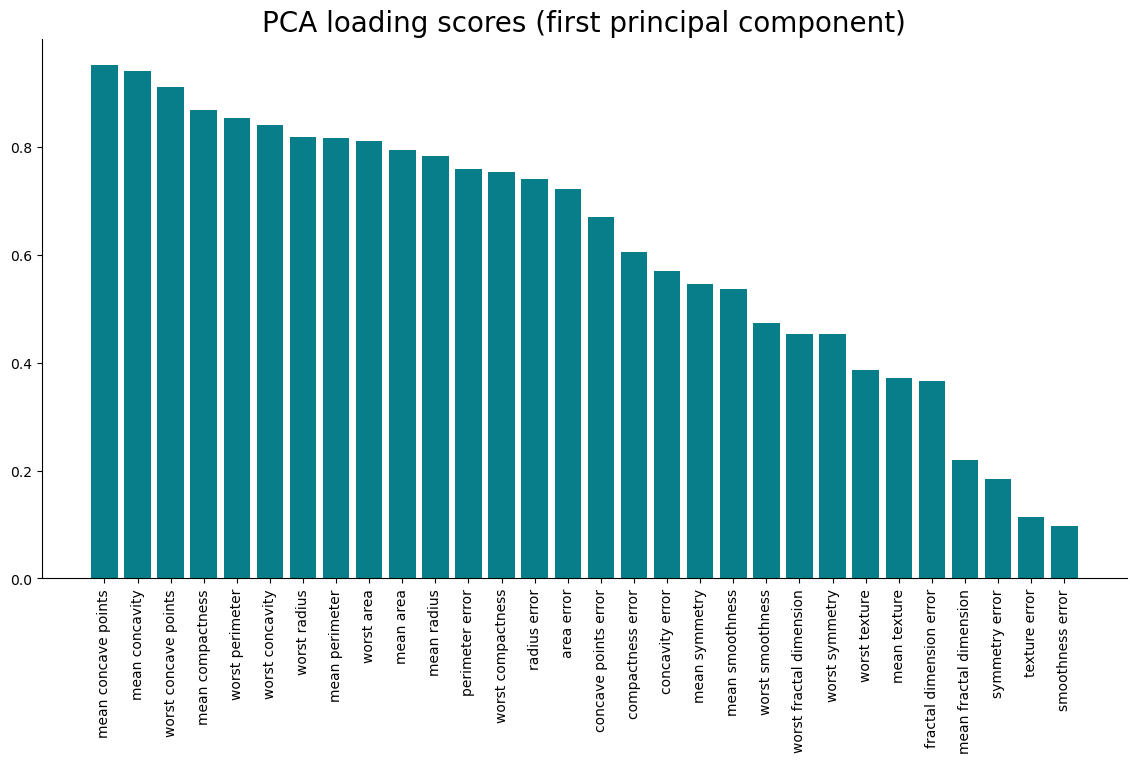

In [10]:

pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()
